In [86]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results"))
df = df[df["select_seed_dataset"].str.contains("2000000")]
len(df)


Filtered 0/486 results with no evaluation metrics
dict_keys(['data', 'full_ot_distance', 'sinkhorn_distance', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'levenshtein_stats', 'args', 'expert_evaluation_metrics', 'evaluation_metrics'])


209

In [134]:
print(df["dataset"].value_counts(), "\n")
print(df["select_full_dataset_size"].value_counts(), "\n")
print(df["select_batch_fill_strategy"].value_counts(), "\n")

dataset
ag_news_10000    119
dbpedia_10000     90
Name: count, dtype: int64 

select_full_dataset_size
1000     79
500      79
5000     43
10000     4
50000     3
100       1
Name: count, dtype: int64 

select_batch_fill_strategy
random           69
greedy           40
bottomk          40
topk             40
topk_balanced    20
Name: count, dtype: int64 



In [135]:
[col for col in df.columns if ("eval" in col or "dataset" in col)]

['dataset',
 'dataset_size',
 'eval_every',
 'select_seed_dataset',
 'select_full_dataset_size',
 'num_eval_epochs',
 'best_eval_loss',
 'best_eval_accuracy',
 'dataset_sinkhorn_distance',
 'dataset_full_ot_distance',
 'dataset_jaccard_overlap_examples',
 'dataset_jaccard_overlap_vocabulary']

In [136]:
df["seed"].value_counts()

seed
42    103
43     98
44      8
Name: count, dtype: int64

In [137]:
df["dataset"].value_counts()

dataset
ag_news_10000    119
dbpedia_10000     90
Name: count, dtype: int64

In [140]:
df["select_label_strategy"].value_counts()

select_label_strategy
auto      100
random     80
Name: count, dtype: int64

In [145]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]
a

iv_cols = ["best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_jaccard_overlap_vocabulary"]

df[(df["select_label_strategy"] == "auto")].groupby(dv_cols)[iv_cols].mean().sort_values(by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)

best_eval_accuracy  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                       
dbpedia_10000 nq_2000000          1000                     topk_balanced                         0.606445   
                                                           topk                                  0.566895   
                                                           random                                0.615234   
                                                           greedy                                0.524414   
                                                           bottomk                               0.566406   
                                  500                      topk_balanced                         0.510254   
                                                           topk                                  0.446289   
                                                           random                                0.516113   
                                                           greedy                                0.458984   
                                                           bottomk                               0.455566   
              msmarco_2000000     5000                     topk_balanced                         0.736816   
                                                           topk                                  0.706543   
                                                           random                                0.726074   
                                                           greedy                                0.689941   
                                                           bottomk                               0.672852   
                                  1000                     topk_balanced                         0.553711   
                                                           topk                                  0.429199   
                                                           random                                0.445801   
                                                           greedy                                0.408691   
                                                           bottomk                               0.456055   
                                  500                      topk_balanced                         0.431641   
                                                           topk                                  0.310059   
                                                           random                                0.356445   
                                                           greedy                                0.297363   
                                                           bottomk                               0.266602   
ag_news_10000 nq_2000000          1000                     topk_balanced                         0.795410   
                                                           topk                                  0.539551   
                                                           random                                0.810547   
                                                           greedy                                0.805664   
                                                           bottomk                               0.535156   
                                  500                      topk_balanced                         0.732910   
                                                           topk                                  0.499512   
                                                           random                                0.779297   
                                                           greedy                                0.738281   
                                                           bottomk                               0.507812   
              msmarco_2000000     5000                

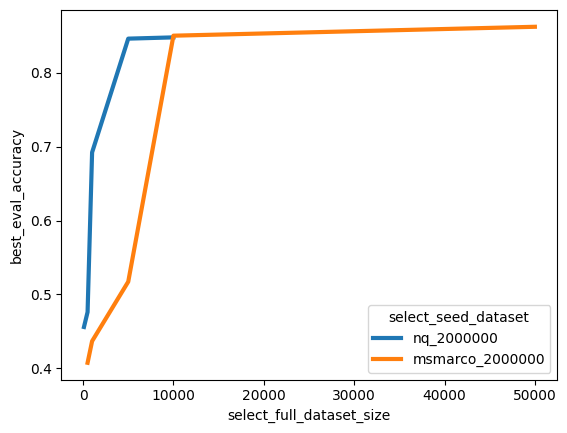

In [115]:
import seaborn as sns

pdf = df.groupby(dv_cols)[iv_cols].mean().sort_values(by=["select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)
pdf = pdf.reset_index()
rdf = pdf[pdf["select_batch_fill_strategy"] == "random"]

ax = sns.lineplot(data=rdf, x="select_full_dataset_size", y="best_eval_accuracy", hue="select_seed_dataset", lw=3)
# sns.lineplot(data=rdf, x="select_full_dataset_size", y="dataset_sinkhorn_distance", hue="select_seed_dataset")
# ax.set_xscale("log")